In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
# --- Build CNN Model ---
model = Sequential([
    Conv2D(64, (5,5), activation='relu', input_shape=(32,32,3)),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (5,5), activation='relu'),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 727,114 (2.77 MB)

 Trainable params: 727,114 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# --- Load CIFAR-10 Data ---
cifar10 = keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()

# Keep original labels for plotting
train_label_original = train_label
test_label_original = test_label

# One-hot encoding
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step


/tmp/ipython-input-3653206567.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = categories[int(test_label_original[idx])]


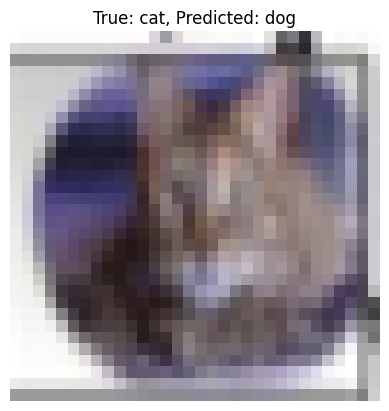

Index: 2133, True Label: cat, Predicted Label: dog


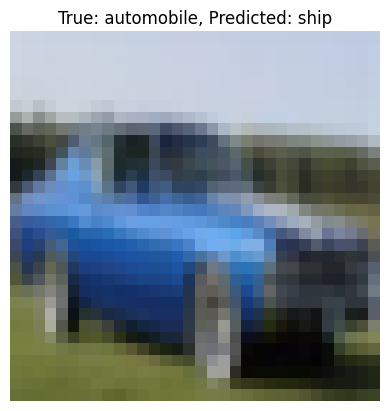

Index: 4206, True Label: automobile, Predicted Label: ship


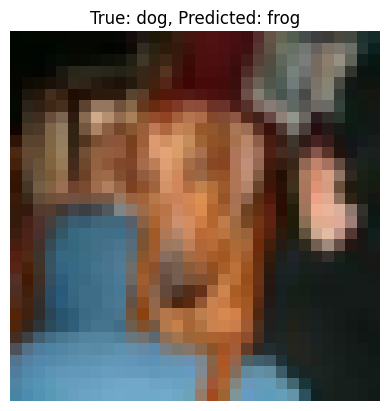

Index: 8410, True Label: dog, Predicted Label: frog


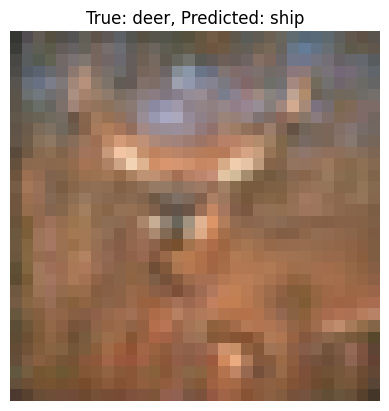

Index: 3510, True Label: deer, Predicted Label: ship


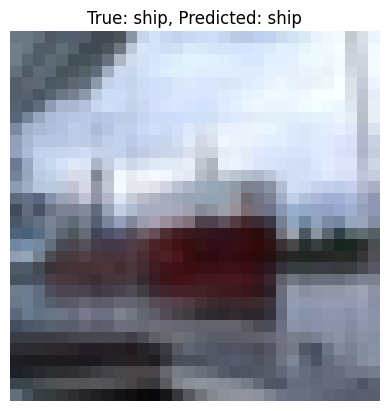

Index: 2347, True Label: ship, Predicted Label: ship


In [7]:
categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Predict on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Pick 5 random test images
random_indices = random.sample(range(len(test_data)), 5)

for idx in random_indices:
    plt.imshow(test_data[idx])
    plt.axis('off')
    true_label = categories[int(test_label_original[idx])]
    pred_label = categories[int(predicted_labels[idx])]
    plt.title(f"True: {true_label}, Predicted: {pred_label}")
    plt.show()
    print(f"Index: {idx}, True Label: {true_label}, Predicted Label: {pred_label}")

In [8]:
# --- Train the model ---
train_history = model.fit(train_data, train_label, epochs=30, batch_size=512, verbose=1)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 592s 6s/step - accuracy: 0.1467 - loss: 34.0481
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 587s 6s/step - accuracy: 0.1766 - loss: 2.5120
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 613s 6s/step - accuracy: 0.2260 - loss: 2.2158
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 578s 6s/step - accuracy: 0.2907 - loss: 2.3639
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.3267 - loss: 2.0625
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.4287 - loss: 1.6406
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 579s 6s/step - accuracy: 0.4770 - loss: 1.5246
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 619s 6s/step - accuracy: 0.5145 - loss: 1.4054
Epoch 9/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.5787 - loss: 1.2311
Epoch 10/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.5921 - loss: 1.2170
Epoch 11/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 575s 6s/step - accuracy: 0.6297 - loss: 1.0924
Epoch 12/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 621s 6s/step - accuracy

In [9]:
# --- Evaluate the model ---
score = model.evaluate(test_data, test_label)
print("Test accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.5916 - loss: 3.4447
Test accuracy: 0.5860000252723694


In [12]:
# Continue training more
train_history2 = model.fit(train_data, train_label, epochs=10, batch_size=512, verbose=1)
score = model.evaluate(test_data, test_label)
# Evaluate again
print("New test accuracy:", score[1])


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 580s 6s/step - accuracy: 0.9620 - loss: 0.1512
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 577s 6s/step - accuracy: 0.9644 - loss: 0.1414
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 580s 6s/step - accuracy: 0.9704 - loss: 0.1119
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 580s 6s/step - accuracy: 0.9612 - loss: 0.1580
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 580s 6s/step - accuracy: 0.9602 - loss: 0.1735
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 581s 6s/step - accuracy: 0.9655 - loss: 0.1486
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 592s 6s/step - accuracy: 0.9651 - loss: 0.1572
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 585s 6s/step - accuracy: 0.9601 - loss: 0.1731
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 583s 6s/step - accuracy: 0.9683 - loss: 0.1289
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 582s 6s/step - accuracy: 0.9690 - loss: 0.1310
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.6109 - loss: 4.9786
New test accuracy: 0.6044999957084656


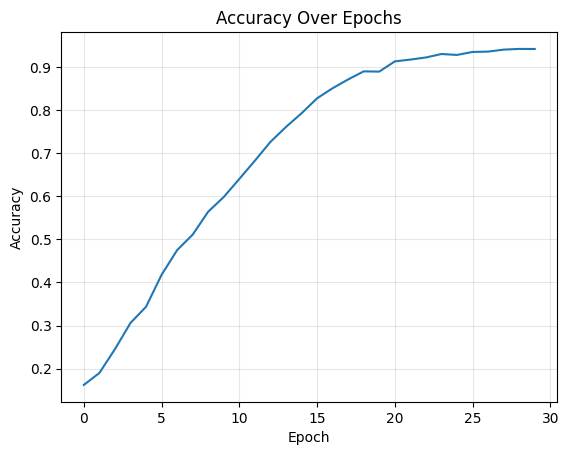

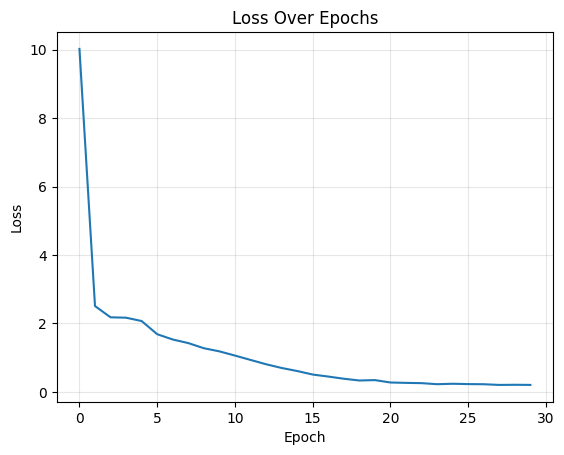

In [13]:
# --- Plot training history ---
def show_train_history(train_history, metric):
    plt.plot(train_history.history[metric])
    plt.title(f'{metric.capitalize()} Over Epochs')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.grid(alpha=0.3)
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')